In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir(globals()['_dh'][0])
os.chdir('..')
# print(os.path.abspath(os.curdir))

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import rfcutils # this corresponds to utility functions provided for the challenge

get_pow = lambda s: np.mean(np.abs(s)**2)
get_sinr = lambda s, i: 10*np.log10(get_pow(s)/get_pow(i))

import rfcutils.qpsk_helper_fn as qpskfn
import rfcutils.ofdm_helper_fn as ofdmfn


---

# Load Plot Settings

In [2]:
window_len = 1280
sig_len = window_len

In [4]:
all_mse, all_ber = pickle.load(open('outputs/NN_Test_20220615.pickle', 'rb'))

In [5]:
all_def_mse, all_def_ber = all_mse.copy(), all_ber.copy()

In [6]:
nn_model_labels = ['RNN', 'UNet K3', 'UNet K3_2x', 'Unet_K101', 'WaveUnet', 'VAE_K15', 'VAE_K101', 'DNN']

In [7]:
all_sinr_ax = np.arange(-30, 4, 1.5)
n_per_sinr = 1000

In [8]:
plt.rcParams['font.size'] = '14'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.markeredgewidth'] = 2
plt.rcParams["font.family"] = "serif"

In [17]:
all_colors = ['tab:brown','tab:pink', 'tab:purple', 'tab:red', 'tab:cyan', 'tab:olive', 'tab:green', 'tab:gray']

# MSE Plot

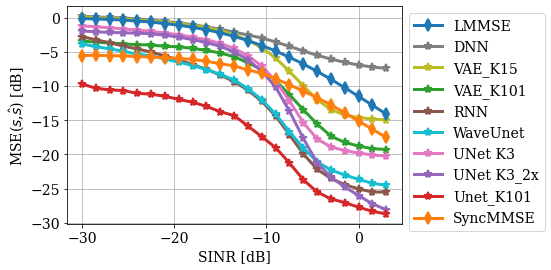

In [24]:
plt.figure()

all_mse = np.array(all_mse)
all_def_mse = np.array(all_def_mse)

plt.plot(all_sinr_ax, 10*np.log10(all_def_mse[:,-2].reshape(-1,n_per_sinr).mean(axis=-1)), 'd-', label="LMMSE", zorder=99)
for i in [7, 5, 6, 0, 4, 1, 2, 3]:
    plt.plot(all_sinr_ax, 10*np.log10(all_mse[:,i].reshape(-1,n_per_sinr).mean(axis=-1)), '*-', label=nn_model_labels[i], color=all_colors[i])

plt.plot(all_sinr_ax, 10*np.log10(all_def_mse[:,-1].reshape(-1,n_per_sinr).mean(axis=-1)), 'd-', label="SyncMMSE")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('SINR [dB]')
plt.ylabel('MSE($s$,$\hat{s}$) [dB]')
plt.show()

# BER Plot

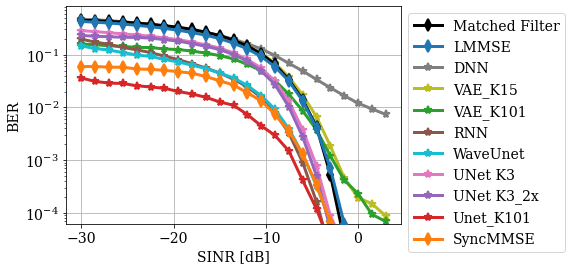

In [25]:
plt.figure()

all_ber = np.array(all_ber)
all_def_ber = np.array(all_def_ber)

plt.semilogy(all_sinr_ax, all_def_ber[:,-3].reshape(-1,n_per_sinr).mean(axis=-1), 'd-', label="Matched Filter", color='k', zorder=98)
plt.semilogy(all_sinr_ax, all_def_ber[:,-2].reshape(-1,n_per_sinr).mean(axis=-1), 'd-', label="LMMSE", zorder=99)
for i in [7, 5, 6, 0, 4, 1, 2, 3]:
    plt.plot(all_sinr_ax, all_ber[:,i].reshape(-1,n_per_sinr).mean(axis=-1), '*-', label=nn_model_labels[i], color=all_colors[i])
        
plt.semilogy(all_sinr_ax, all_def_ber[:,-1].reshape(-1,n_per_sinr).mean(axis=-1), 'd-', label="SyncMMSE")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('SINR [dB]')
plt.ylabel('BER')
plt.ylim([1/16000, 1])
plt.show()